In [6]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [9]:
np.random.seed(42)
X = np.random.rand(100,1) -0.5
y = 3*X[:,0]**2 +0.05*np.random.randn(100)

# added some randomness using 0.05*np.random.randn(100)

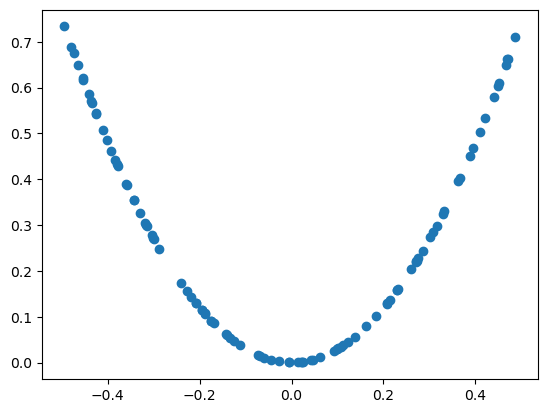

In [10]:
plt.scatter(X,3*X[:,0]**2)

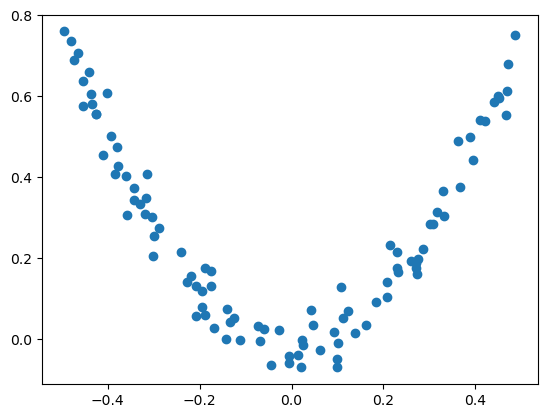

In [11]:
plt.scatter(X,y)
# With Randomness

In [7]:
df = pd.DataFrame()
df["X"] = X.reshape(100)
df["y"] = y

In [8]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


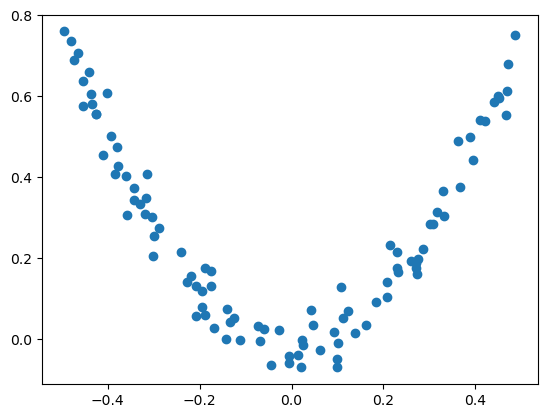

In [12]:
plt.scatter(df["X"],df["y"])

In [13]:
# Step 1 - Finding out the mean of target

In [14]:
df["pred1"] = df["y"].mean()

In [15]:
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [16]:
# Step 2 - Calculating psudo residual

In [17]:
df["res1"] = df["y"] - df["pred1"]

In [18]:
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


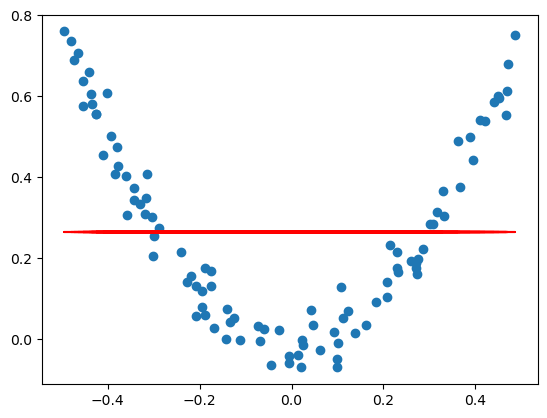

In [20]:
plt.scatter(df["X"],df["y"])
plt.plot(df["X"],df["pred1"], color = "red")
# red is the my M1 model that is mean

In [21]:
# Step 3 - Building a decision tree

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
# In gradient boost unlike adaboost we dont take stumps but rather take max_leaf_nodes between 8 & 32
# here we use bit bigger decision trees
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [25]:
tree1.fit(df["X"].values.reshape(100,1), df["res1"].values)

DecisionTreeRegressor(max_leaf_nodes=8)

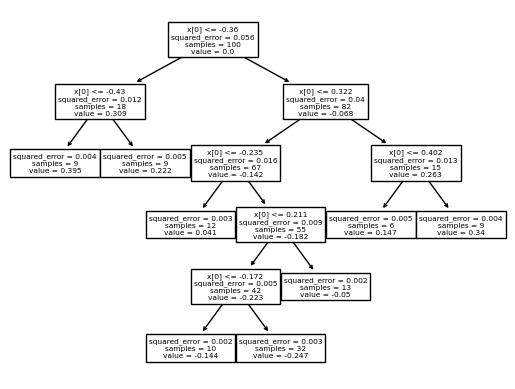

In [26]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [28]:
# Step 4 - Creating new test set

In [29]:
# Generating X_test
X_test = np.linspace(-0.5,0.5,500)
# 500 points between -0.5 & 0.5

In [35]:
# We are adding output of model 1 & output of model 2
# Model 1 is just the mean
# Model 2 is the decision tree
y_pred = 0.265 + tree1.predict(X_test.reshape(500,1))

In [36]:
# Step 5 - Prediction of model1 + Model2

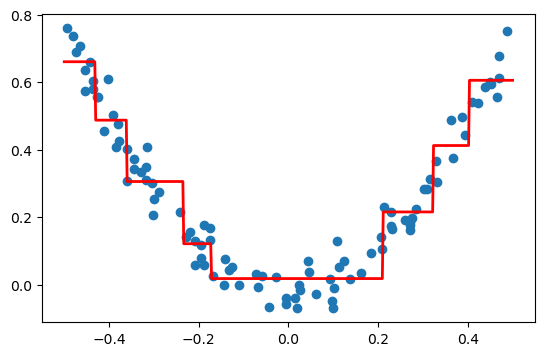

In [37]:
plt.figure(figsize = (14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth = 2, color = "r")
plt.scatter(df["X"],df["y"])

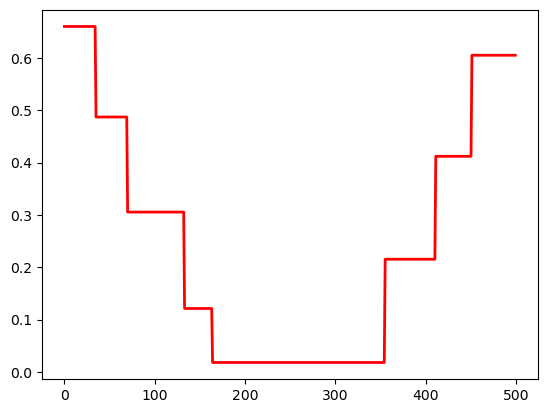

In [34]:
plt.plot(y_pred, linewidth = 2, color = "r")

In [40]:
# Step 5 - Prediction of model1 + Model2

In [41]:
df["pred2"] = 0.265 + tree1.predict(df["X"].values.reshape(100,1))

In [42]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.017861
1,0.450714,0.594480,0.265458,0.329021,0.605426
2,0.231994,0.166052,0.265458,-0.099407,0.215326
3,0.098658,-0.070178,0.265458,-0.335636,0.017861
4,-0.343981,0.343986,0.265458,0.078528,0.305506
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.017861
96,0.022733,-0.002305,0.265458,-0.267763,0.017861
97,-0.072459,0.032809,0.265458,-0.232650,0.017861
98,-0.474581,0.689516,0.265458,0.424057,0.660454


In [ ]:
# Step 6 - calculating residual 2

In [43]:
df["res2"] = df["y"] - df["pred2"]

In [44]:
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.017861,0.033712
1,0.450714,0.594480,0.265458,0.329021,0.605426,-0.010946
2,0.231994,0.166052,0.265458,-0.099407,0.215326,-0.049274
3,0.098658,-0.070178,0.265458,-0.335636,0.017861,-0.088039
4,-0.343981,0.343986,0.265458,0.078528,0.305506,0.038480
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.017861,-0.058536
96,0.022733,-0.002305,0.265458,-0.267763,0.017861,-0.020166
97,-0.072459,0.032809,0.265458,-0.232650,0.017861,0.014947
98,-0.474581,0.689516,0.265458,0.424057,0.660454,0.029062


In [45]:
# Step 7 - building decision tree again

In [46]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [47]:
tree2.fit(df["X"].values.reshape(100,1), df["res2"].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [48]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1,1)) for regressor in [tree1, tree2])

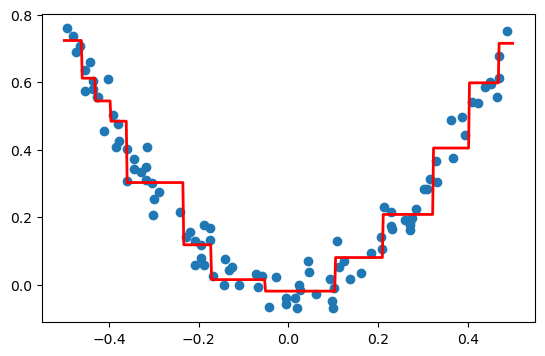

In [49]:
plt.figure(figsize = (14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth = 2, color = "r")
plt.scatter(df["X"],df["y"])

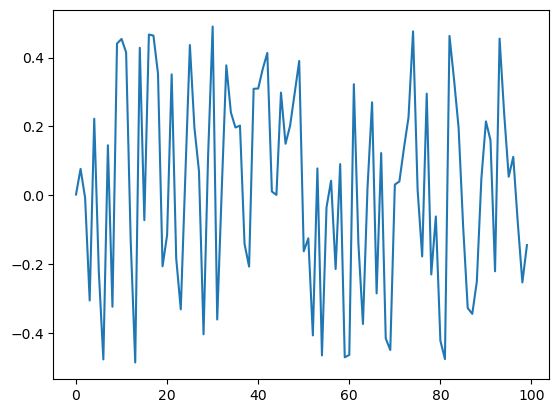

In [50]:
plt.plot(np.random.rand(100,1) -0.5)

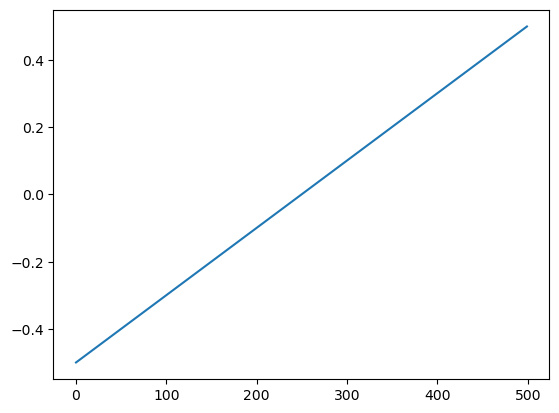

In [52]:
plt.plot(X_test.reshape(500,1))

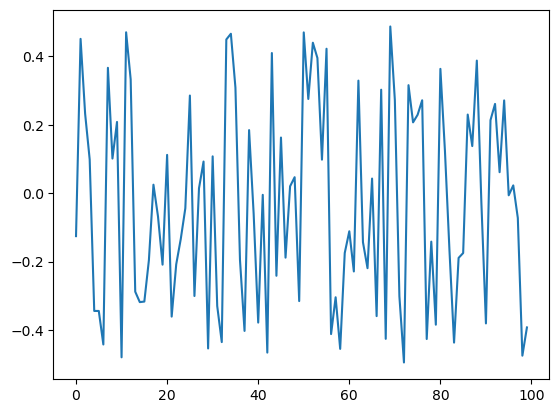

In [56]:
plt.plot(X.reshape(100,1))

In [64]:
def gradient_boost(X,y, number, lr, count = 1, regs = [], foo = None):
    
    if number ==0:
        return
    else:
        
        if count >1:
            y = y - regs[-1].predict(X)
        else:
            foo = y
            
            tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
            tree_reg.fit(X,y)
            
            regs.append(tree_reg)
            
            x1 = np.linspace(-0.5,0.5,500)
            y_pred = sum(lr*regressor.predict(x1.reshape(-1,1)) for regressor in regs)
            
            print(number)
            
            plt.figure()
            plt.plot(x1, y_pred, linewidth = 2)
            plt.plot(X[:, 0], foo, "r.")
            plt.show()
            
            gradient_boost(X, y, number - 1, lr, count+1,regs, foo = foo)
            
            

5


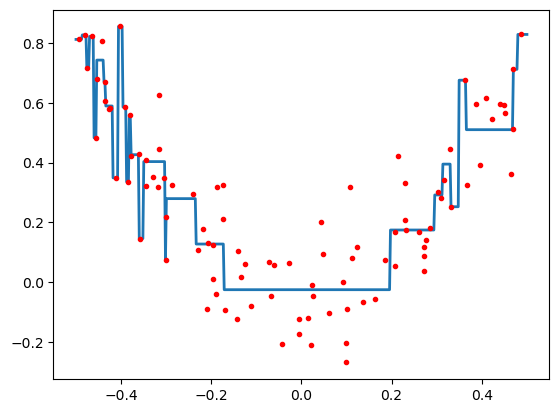

In [65]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*(X[:,0]**2 + 0.05*np.random.randn(100))
gradient_boost(X,y, 5, lr = 1)